# Ciência dos Dados - Projeto 03 - 

$Arthur\space Alegro \space de \space Oliveira$

$Pedro\space dos\space Santos \space e \space Silva$

$Jhonata\space Ferreira\space de \space Souza$

## Base de Dados:

Base de dados do ENEM referente aos anos de 2015 e 2016 extraídas pelo site http://portal.inep.gov.br/microdados.

Nomes dos arquivos:
* MICRODADOS_ENEM_2015.csv
* MICRODADOS_ENEM_2016.csv

**OBS.:** Para rodar corretamente este arquivo arquivo iJupyter Notebook (`.ipynb`)  deve-se extrair o arquivo `.zip` correspondente, acessar a pasta "DADOS" e colocar os arquivos `.csv` citados anteriormente no mesmo diretório deste arquivo.


## Importando Bibliotecas:

In [2]:
% matplotlib inline
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
import warnings
import time
import os

## Diretório:

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\duals\Documents\GitHub\Data-Science-2018\Projeto 03


## Verificando Dimensões dos arquivos:

In [5]:
def thousand_dot(number):
    """Convert int value in a string with dots as thousands separator"""
    lista = []
    count = 0
    for digit in (str(number))[::-1]:
        lista.append(digit)
        count +=1
        if count == 3:
            lista.append('.')
            count = 0
    lista.reverse
    elements = ''.join(lista)[::-1]
    return elements

def dimension_calculator(filename, chunksize=1000, sep=','):
    """Counts the amount of rowns and columns on a .csv file"""
    # Raising warning:
    warnings.warn("\n\nWARNING! Depending on chunksize value and/or file size this process might take time to compute")
    # Parameters:
    rows = 0
    columns_labels = ''
    count = True
    # Process progress exibited to user:
    print("Processing...")
    # Opening database and counting values:
    for chunk in pd.read_csv(filename, chunksize=chunksize, encoding='latin-1', header=0, sep=sep):
        rows += len(chunk['NU_INSCRICAO'])
        if count == True:
            columns_labels = chunk.columns.values
            count = False
            
    # Process progress exibited to user:
    print("Process complete\n")   
    print("Number of rows: {}".format(thousand_dot(rows)))
    print("Number of columns: {}".format(len(columns_labels)))
    print("Number of elements: {}".format(thousand_dot(rows*len(columns_labels))))

* **2015**

In [6]:
dimension_calculator("MICRODADOS_ENEM_2015.csv")

C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: 

WARNING! Depending on chunksize value and/or file size this process might take time to compute


Processing...
Process complete

Number of rows: 7.746.427
Number of columns: 166
Number of elements: 1.285.906.882


* **2016**

In [8]:
dimension_calculator("MICRODADOS_ENEM_2016.csv", sep=';')

C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: 

WARNING! Depending on chunksize value and/or file size this process might take time to compute


Processing...
Process complete

Number of rows: 8.627.367
Number of columns: 166
Number of elements: 1.432.142.922


## Separando parte do DataFrame:

Selecionamos uma parte da base de dados (100.000 rows de dados) para análise em escala reduzida.

Após todas as filtragens e cálculos forem concluídos, todo o processo será refeito para cada `chunk`, podendo aplicar as implementações para todo a base de dados muito mais rápido, sem a necessidade de carregar o arquivo completo de uma vez (o que pode ser impossível, pois, em alguns casos, demanda mais processamento e memória que o computador possui)

In [22]:
def save_df(to_open_filename, to_save_filename, iteration_times, chunksize=1000):
    # Raising warning:
    warnings.warn("\n\nWARNING! Depending on chunksize value and/or file size this process might take time to compute")
    
    # Counters and Status Controllers:
    chunkcounter = 0
    shapecounter = [0, 0]
    add_header = True
    
    # Process progress exibited to user:
    print("Opening file...")
    
    # Loading command to export and append dataframes to a .xlsx file (also creates a new one, if it doesn't exist):
    writer = pd.ExcelWriter(to_save_filename, engine='openpyxl')
        
    # Loading database in chunks and defining chunk size, correct enconding and reading configs:
    for chunk in pd.read_csv(to_open_filename, chunksize=chunksize, encoding='latin-1', header=0, sep=','):
   
        if chunkcounter < iteration_times:
            # Selecting relevant parameters to ignore useless data:
            chunk = chunk[(chunk["TP_PRESENCA_CN"] == 1) & (chunk["TP_PRESENCA_CH"] == 1) & 
                          (chunk["TP_PRESENCA_LC"] == 1) & (chunk["TP_PRESENCA_MT"] == 1) & 
                          (chunk["TP_STATUS_REDACAO"] == 1) & (chunk["IN_TREINEIRO"] == 0)]
            
            # Selecting relevant parameters for fitering data:
            chunk = chunk.loc[:, ["SG_UF_RESIDENCIA", "NU_IDADE", "TP_SEXO", "TP_ESTADO_CIIVL", "TP_COR_RACA", "TP_ST_CONCLUSAO", 
                                  "TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q006"]]

            # Exporting dataframe to a new .xlsx file under existent data:
            chunk.to_excel(writer, sheet_name='Sheet1', index=False, startrow=shapecounter[0],startcol=0, header=add_header)
            
            # Counters update and progress of the process exhibited to the user:
            chunkcounter += 1
            shapecounter[0] += chunk.shape[0]
            shapecounter[1] = chunk.shape[1]
            print("Processing... ({}/{}) - File current size:({} rows, {} columns)".format(chunkcounter, iteration_times, shapecounter[0], shapecounter[1]))

        else:
            # Process progress exibited to user and breaking loop:
            print("Process complete")
            break
            
        # Counter update (avoid previous chunk's last row to be overwritten):
        if chunkcounter == 1:
            shapecounter[0] += 1
        # Status update (avoid header to be added again):
        add_header = False
        
    # Saving new .xlsx file:
    writer.save()

In [28]:
# Creating filtered .xslx file:
save_df('MICRODADOS_ENEM_2015.csv','test8_dataframe.xlsx', chunksize=10000, iteration_times=775)

C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

WARNING! Depending on chunksize value and/or file size this process might take time to compute
  This is separate from the ipykernel package so we can avoid doing imports until


Opening file...


C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Processing... (1/775) - File current size:(7039 rows, 13 columns)
Processing... (2/775) - File current size:(14315 rows, 13 columns)
Processing... (3/775) - File current size:(21595 rows, 13 columns)
Processing... (4/775) - File current size:(28801 rows, 13 columns)
Processing... (5/775) - File current size:(35977 rows, 13 columns)
Processing... (6/775) - File current size:(43208 rows, 13 columns)
Processing... (7/775) - File current size:(50364 rows, 13 columns)
Processing... (8/775) - File current size:(57599 rows, 13 columns)
Processing... (9/775) - File current size:(64692 rows, 13 columns)
Processing... (10/775) - File current size:(71947 rows, 13 columns)
Processing... (11/775) - File current size:(79162 rows, 13 columns)
Processing... (12/775) - File current size:(86411 rows, 13 columns)
Processing... (13/775) - File current size:(93620 rows, 13 columns)
Processing... (14/775) - File current size:(100810 rows, 13 columns)
Processing... (15/775) - File current size:(107944 rows, 

Processing... (120/775) - File current size:(865307 rows, 13 columns)
Processing... (121/775) - File current size:(872578 rows, 13 columns)
Processing... (122/775) - File current size:(879786 rows, 13 columns)
Processing... (123/775) - File current size:(887099 rows, 13 columns)
Processing... (124/775) - File current size:(894492 rows, 13 columns)
Processing... (125/775) - File current size:(901872 rows, 13 columns)
Processing... (126/775) - File current size:(909396 rows, 13 columns)
Processing... (127/775) - File current size:(916821 rows, 13 columns)
Processing... (128/775) - File current size:(924364 rows, 13 columns)
Processing... (129/775) - File current size:(931938 rows, 13 columns)
Processing... (130/775) - File current size:(939549 rows, 13 columns)
Processing... (131/775) - File current size:(947095 rows, 13 columns)
Processing... (132/775) - File current size:(954570 rows, 13 columns)
Processing... (133/775) - File current size:(962029 rows, 13 columns)
Processing... (134/7

Processing... (236/775) - File current size:(1669783 rows, 13 columns)
Processing... (237/775) - File current size:(1676362 rows, 13 columns)
Processing... (238/775) - File current size:(1683020 rows, 13 columns)
Processing... (239/775) - File current size:(1689614 rows, 13 columns)
Processing... (240/775) - File current size:(1696175 rows, 13 columns)
Processing... (241/775) - File current size:(1702673 rows, 13 columns)
Processing... (242/775) - File current size:(1709097 rows, 13 columns)
Processing... (243/775) - File current size:(1715527 rows, 13 columns)
Processing... (244/775) - File current size:(1722052 rows, 13 columns)
Processing... (245/775) - File current size:(1728617 rows, 13 columns)
Processing... (246/775) - File current size:(1735217 rows, 13 columns)
Processing... (247/775) - File current size:(1741792 rows, 13 columns)
Processing... (248/775) - File current size:(1748452 rows, 13 columns)
Processing... (249/775) - File current size:(1755020 rows, 13 columns)
Proces

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-fc09990f42cf>", line 2, in <module>
    save_df('MICRODADOS_ENEM_2015.csv','test8_dataframe.xlsx', chunksize=10000, iteration_times=775)
  File "<ipython-input-22-67b760d05dd5>", line 29, in save_df
    chunk.to_excel(writer, sheet_name='Sheet1', index=False, startrow=shapecounter[0],startcol=0, header=add_header)
  File "C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py", line 1545, in to_excel
    engine=engine)
  File "C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\formats\excel.py", line 649, in write
    freeze_panes=freeze_panes)
  File "C:\Users\duals\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\excel.py", line 1402, in write_cells
    column=startcol 

KeyboardInterrupt: 

## Trabalhando com parte da Base de Dados:

In [1]:
df = pd.read_excel('test8_dataframe.xlsx', encoding='latin-1', header=0)
df = df.iloc[:, ["SG_UF_RESIDENCIA", "NU_IDADE", "TP_SEXO", "TP_ESTADO_CIIVL", "TP_COR_RACA", "TP_ST_CONCLUSAO", 
                                  "TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q006"]]

NameError: name 'pd' is not defined

Nome das colunas:
* *SG_UF_RESIDENCIA*: Sigla da Unidade de Federação da residência do candidato
* *NU_IDADE*: Idade do candidato
* *TP_SEXO*: Sexo do candidato
* *TP_ESTADO_CIIVL*: Estado Civil do candidato
* *TP_COR_RACA*: Raça do candidato
* *TP_ST_CONCLUSAO*: Situação de conclusão do Ensino Médio
* *TP_ESCOLA*: Tipo de escola do Ensino Médio
* *NU_NOTA*: Notas nas provas, sendo: 

CN  | CH | LC | MT | REDACAO
------------- | ------------- | ------------- | ------------- | ------------- |
Ciências da Natureza  | Ciências Humanas | Linguagens e Códigos | Matemática | Redação
* Q006: Diz a renda mensal da família

# Porquê essas colunas foram escolhidas?

- A Unidade de Federação é bem relevante no acesso à escolaridade, pois sabe-se que, no Brasil, educação de boa qualidade, de maneira geral, é acessada por meios privados. Sendo assim, há regiões que são pobres em desenvolvimento humano.
- Idade influencia, tendo em vista que um jovem de 17-20 anos tende a lembrar mais do conteudo ante a um adulto de 30+
- "Raça" tem grande peso na nota, tendo em vista o sistema de cotas
- Situação de conclusão do Ensino Médio diz, aproximadamente, se o candidato se encontra preparado para a prova, ou não
- Tipo de escola nos ajuda a montar o perfil do aluno, e  o que esperar do seu desempenho
- Nota da prova é útil para a análise pra estabelecer a base de treinamento

## Bibliografia:

Sites consultados:
* https://openpyxl.readthedocs.io/en/2.5/pandas.html
* 
* 
* 
* 
* 
* 
* 

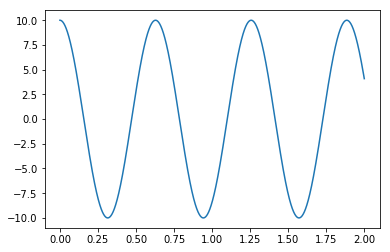

In [32]:
def vin(t):
    vp = 10
    vin = vp*cos(10*t)
    return vin
tempo = np.arange(0,2,1e-4)
plt.plot(tempo, [vin(t) for t in tempo])
plt.show()